In [1]:
#Importing Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
from random import shuffle
from sklearn.model_selection import train_test_split

##Building Model
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, TimeDistributed,Dropout, Activation, Flatten,Conv2D, MaxPooling2D,LSTM,Bidirectional, Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import Input
from tensorflow.keras.callbacks import ModelCheckpoint
import os

In [3]:
# #Folder in which the converted images will be saved
# outs_dataFrames="Our Dataset"
# img_size=64

# # Building Function that will read videos using opencv and save them as Dataframe on ##outs_dataFrames_Folder
# def extract_Frames(videos_folder):
#     '''
#     Reading the videos from a certain folders and get the frames to store them in another
#     folder.
#     Parameters:
#         videos_folder (str):The folder path that contains the videos.
#     Returns:
#         None : only reading the videos
#     '''
#     dataset1=[]
#     images1=[]
#     limit1=0
#     count1=0

#     dataset2=[]
#     images2=[]
#     limit2=0
#     count2=0
#     num_frames=8
#     c1=0
#     c2=0

#     total_files = sum([len(files) for _, _, files in os.walk(videos_folder)])
#     processed_files = 0

#     for category in ["Violence", "NonViolence"]:
#         category_path = os.path.join(videos_folder, category)

#         for file in os.listdir(category_path):
#             processed_files += 1
#             print(f"Processing file {processed_files} of {total_files}")

#             if file[0:1]=="V":
#                 file_path=os.path.join(category_path,file)
#                 cap=cv2.VideoCapture(file_path)

#                 success=True
#                 while success:
#                     success,image=cap.read()
#                     if not success:
#                         break

#                     image=cv2.resize(image,(img_size,img_size))
#                     c1+=1

#                     if image is not None:
#                         images1.append(np.array(image))
#                         limit1+=1
#                         count1+=1
#                         if limit1==num_frames:
#                             limit1 = 0
#                             # Flatten each image in images1
#                             flattened_images = [image.flatten() for image in images1]
#                             # Append flattened_images and np.array([0,1]) to dataset1
#                             dataset1.append([flattened_images, np.array([0,1])])
#                             images1 = []


#             elif file[0:1]=="N":
#                 file_path=os.path.join(category_path,file)
#                 cap=cv2.VideoCapture(file_path)

#                 success=True
#                 while success:
#                     success,image=cap.read()
#                     if not success:
#                         break

#                     image=cv2.resize(image,(img_size,img_size))

#                     images2.append(np.array(image))
#                     limit2+=1
#                     count2+=1
#                     if limit2==num_frames:
#                         limit2 = 0
#                         # Flatten each image in images2
#                         flattened_images = [image.flatten() for image in images2]
#                         # Append flattened_images and np.array([1,0]) to dataset2
#                         dataset2.append([flattened_images, np.array([1,0])])
#                         images2 = []
#                     c2+=1
#         print(c1)
#         print(c2)

#         dataset=dataset1+dataset2

#     return dataset

In [4]:
# data=extract_Frames("/content/Our Dataset/")

In [5]:
# np.array(data[0][0]).shape

In [6]:
# ## settting parameters for Funtion of creating Dataset
# total=41015

# ## Setting Parameters for Model
# optm='SGD'
# lr=.01
# epochs=25
# batch_size=5
# num_frames=10

In [7]:
# training, test = train_test_split(data, train_size= 0.9)
# Train,Valid=train_test_split(training, train_size= 0.8)

In [8]:
# X_train = np.array([i[0] for i in Train]).reshape(-1, 8, img_size, img_size, 3)
# y_train = np.array([i[1] for i in Train])

# X_valid = np.array([i[0] for i in Valid]).reshape(-1, 8, img_size, img_size, 3)
# y_valid = np.array([i[1] for i in Valid])

# X_test = np.array([i[0] for i in test]).reshape(-1, 8, img_size, img_size, 3)
# y_test = np.array([i[1] for i in test])

In [9]:
# np.save("X_train.npy", X_train.astype('float16') / 255)
# np.save("X_valid.npy", X_valid.astype('float16') / 255)
# np.save("X_test.npy", X_test.astype('float16') / 255)
# np.save("X_train.npy", X_train.astype('float16') / 255)

In [10]:
# from google.colab import drive
# drive.mount('/content/drive')


In [11]:
# !pip install gdown
# !gdown --id 1frW265EupzYK7pmVMeGxT6aujlRSA53u -O X_train.npy
# !gdown --id 1PX7Wck8FKDdjUFMVccOvdzQ02vc22Uz7 -O X_test.npy
# !gdown --id 1_k6Vj3PY-74zu0xyC3fAP4SQfCTWJnDD -O X_valid.npy



In [12]:
# Copy X_train.npy from Drive to Colab's local storage
# !cp /content/drive/MyDrive/X_train.npy /content/

In [2]:

import numpy as np

X_train = np.load("/kaggle/input/filesx/X_train.npy", mmap_mode='r')
X_valid = np.load("/kaggle/input/filesx/X_valid.npy", mmap_mode='r')
X_test = np.load("/kaggle/input/filesx/X_test.npy", mmap_mode='r')
y_train = np.load("/kaggle/input/files/y_train.npy", mmap_mode='r')
y_valid = np.load("/kaggle/input/files/y_valid.npy", mmap_mode='r')
y_test = np.load("/kaggle/input/files/y_test.npy", mmap_mode='r')


In [14]:
# from tensorflow.keras.utils import to_categorical

# # Convert y_train and y_valid to one-hot encoded format
# num_classes = 2  # Since it's binary classification
# y_train = to_categorical(y_train, num_classes)
# y_valid = to_categorical(y_valid, num_classes)

In [3]:
print("X_train shape "+ str(X_train.shape))
print("X_valid shape "+ str(X_valid.shape))
print("X_test shape "+ str(X_test.shape))

X_train shape (25862, 8, 64, 64, 3)
X_valid shape (6466, 8, 64, 64, 3)
X_test shape (3592, 8, 64, 64, 3)


In [4]:
# y_train = y_train[:, 0, :]  # Keep only one row per sample
# y_valid = y_valid[:, 0, :]

print("y_train shape:", y_train.shape)
print("y_valid shape:", y_valid.shape)


y_train shape: (25862, 2)
y_valid shape: (6466, 2)


In [17]:
# import tensorflow as tf
# import functools

# BATCH_SIZE = 8
# img_size = 64
# frames = 8  # Number of frames per video

# # Define a proper generator function
# def data_generator(X, y):
#     def generator():
#         for i in range(len(X)):
#             yield X[i].astype('float32'), y[i].astype('int32')  # Ensure correct dtype
#     return generator

# # Use functools.partial to correctly pass data
# train_dataset = tf.data.Dataset.from_generator(
#     functools.partial(data_generator, X_train, y_train),
#     output_signature=(
#         tf.TensorSpec(shape=(frames, img_size, img_size, 3), dtype=tf.float32),
#         tf.TensorSpec(shape=(2,), dtype=tf.int32)  # Match label shape
#     )
# ).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# valid_dataset = tf.data.Dataset.from_generator(
#     functools.partial(data_generator, X_valid, y_valid),
#     output_signature=(
#         tf.TensorSpec(shape=(frames, img_size, img_size, 3), dtype=tf.float32),
#         tf.TensorSpec(shape=(2,), dtype=tf.int32)
#     )
# ).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, 8, 64, 64, 64)       │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 8, 62, 62, 64)       │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 8, 31, 31, 64)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, 8, 29, 29, 64)       │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_4 (TimeDistributed) │ (None, 8, 14, 14, 64)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_5 (TimeDistributed) │ (None, 8, 12, 12, 64)       │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_6 (TimeDistributed) │ (None, 8, 6, 6, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_7 (TimeDistributed) │ (None, 8, 2304)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 8, 2304)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 64)                  │         598,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 717,154 (2.74 MB)

 Trainable params: 717,154 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

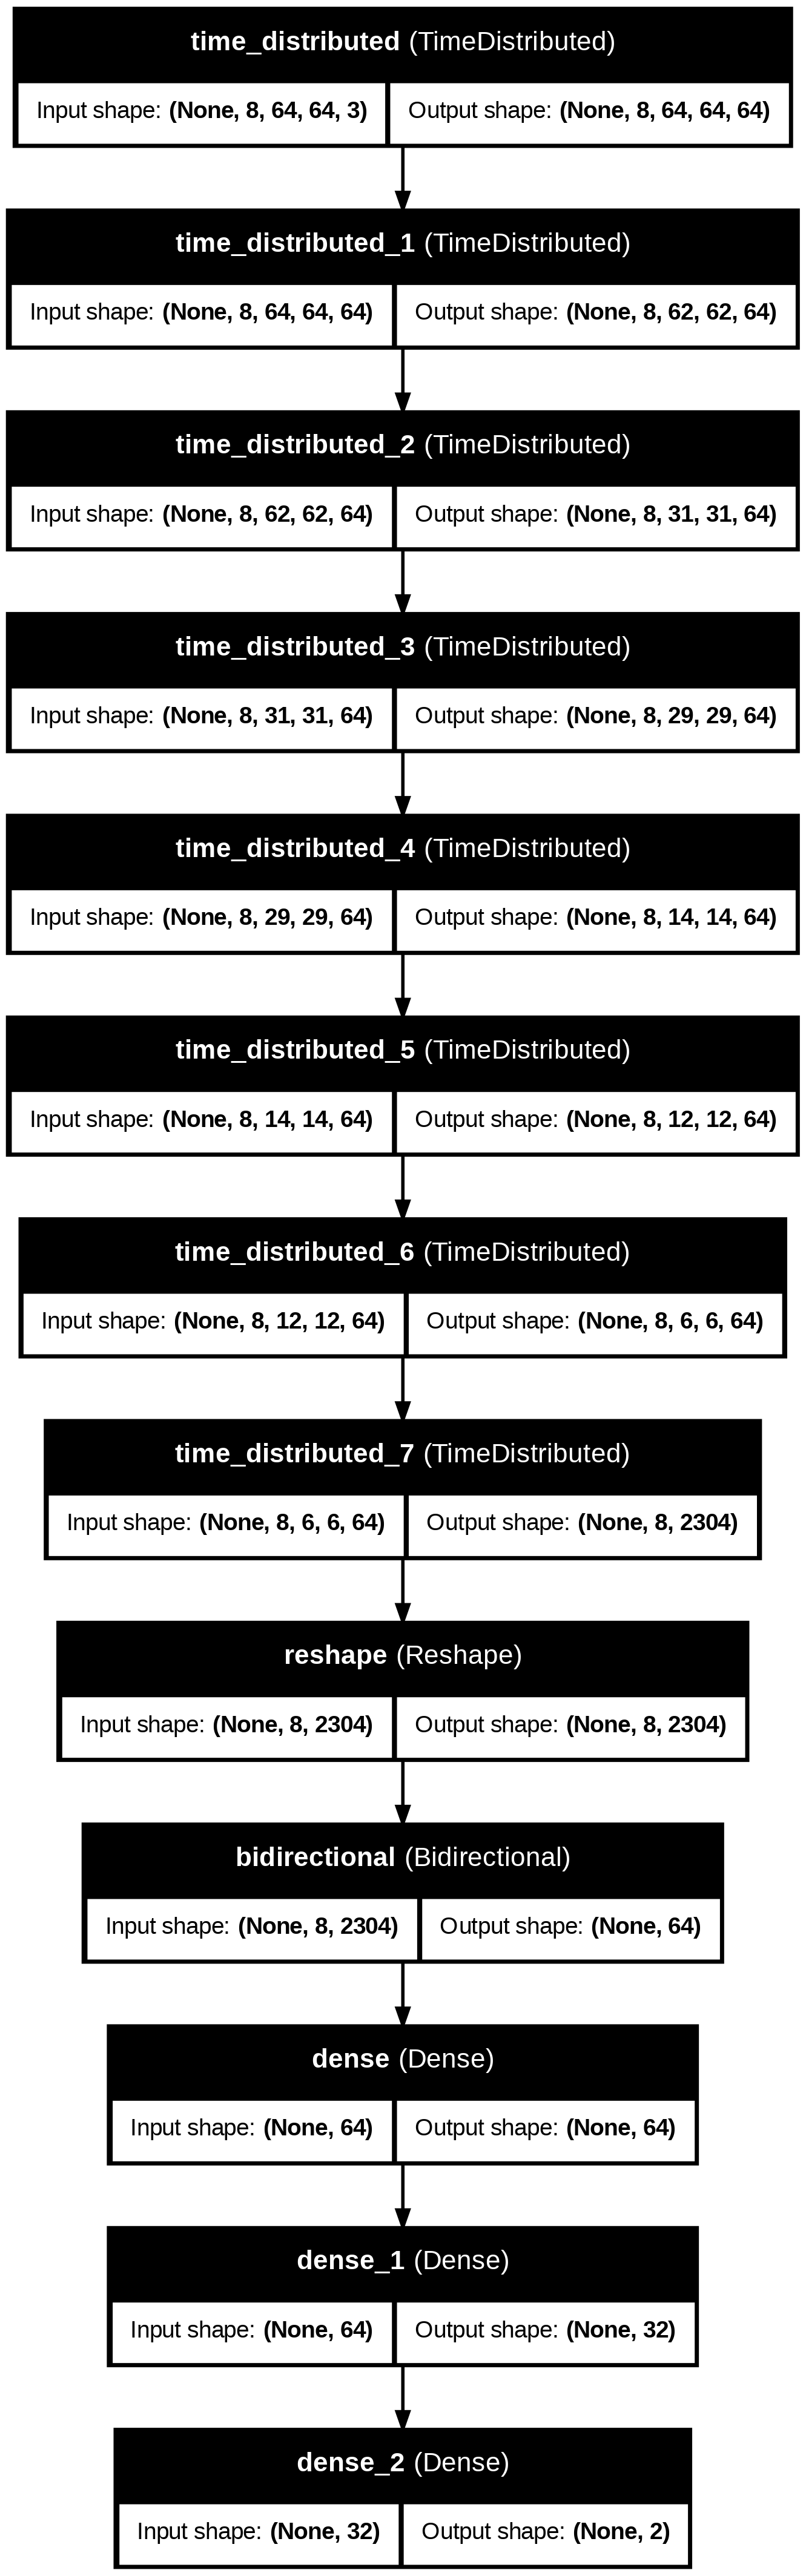

In [5]:
from tensorflow.keras.layers import LSTM, Bidirectional, Conv2D, Dense, Flatten, MaxPooling2D, TimeDistributed, Reshape
from tensorflow.keras.models import Sequential

img_size = 64  # Image size
frames = 8  # Number of frames per video

cnn = Sequential()

# TimeDistributed CNN layers for frame-wise feature extraction
cnn.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu', padding="same"),
                        input_shape=(frames, img_size, img_size, 3)))
cnn.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu')))
cnn.add(TimeDistributed(MaxPooling2D((2, 2))))
cnn.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu')))
cnn.add(TimeDistributed(MaxPooling2D((2, 2))))
cnn.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu')))
cnn.add(TimeDistributed(MaxPooling2D((2, 2))))

# Flatten the CNN features for each frame
cnn.add(TimeDistributed(Flatten()))

# Reshape to (timesteps, features) format for LSTM
cnn.add(Reshape((frames, -1)))  # Automatically calculates features per frame

# Bidirectional LSTM for temporal feature extraction
lstm_fw = LSTM(units=32, return_sequences=False)
lstm_bw = LSTM(units=32, go_backwards=True, return_sequences=False)

cnn.add(Bidirectional(lstm_fw, backward_layer=lstm_bw))

# Fully connected layers for classification
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(32, activation='relu'))
cnn.add(Dense(2, activation='sigmoid'))

cnn.summary()

# Visualize Model
from tensorflow.keras.utils import plot_model
plot_model(cnn, to_file='model.png', show_shapes=True, show_layer_names=True)

In [6]:
cnn.compile(loss='categorical_crossentropy',optimizer="SGD",metrics=['accuracy'])

In [7]:
##CallBacks
early_stopp = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=3,min_lr=0.00005,verbose=1)

#callbacks
checkpoint_path="cp{epoch:04d}.weights.h5"
checkpoint_dir=os.path.dirname(checkpoint_path)

callback = ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)

In [8]:
import tensorflow as tf  

# Create dataset from NumPy arrays  
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))

# Shuffle, batch, and prefetch to optimize memory usage  
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(2).prefetch(tf.data.experimental.AUTOTUNE)
valid_dataset = valid_dataset.batch(2).prefetch(tf.data.experimental.AUTOTUNE)

# Train with dataset instead of full arrays  
history = cnn.fit(train_dataset, epochs=12, validation_data=valid_dataset, verbose=1)


Epoch 1/12
12931/12931 ━━━━━━━━━━━━━━━━━━━━ 223s 17ms/step - accuracy: 0.6250 - loss: 0.6188 - val_accuracy: 0.8093 - val_loss: 0.4037
Epoch 2/12
12931/12931 ━━━━━━━━━━━━━━━━━━━━ 210s 16ms/step - accuracy: 0.8527 - loss: 0.3350 - val_accuracy: 0.9012 - val_loss: 0.2460
Epoch 3/12
12931/12931 ━━━━━━━━━━━━━━━━━━━━ 210s 16ms/step - accuracy: 0.9188 - loss: 0.2000 - val_accuracy: 0.9369 - val_loss: 0.1617
Epoch 4/12
12931/12931 ━━━━━━━━━━━━━━━━━━━━ 212s 16ms/step - accuracy: 0.9491 - loss: 0.1307 - val_accuracy: 0.9516 - val_loss: 0.1293
Epoch 5/12
12931/12931 ━━━━━━━━━━━━━━━━━━━━ 210s 16ms/step - accuracy: 0.9628 - loss: 0.0983 - val_accuracy: 0.9595 - val_loss: 0.1049
Epoch 6/12
12931/12931 ━━━━━━━━━━━━━━━━━━━━ 210s 16ms/step - accuracy: 0.9731 - loss: 0.0717 - val_accuracy: 0.9477 - val_loss: 0.1437
Epoch 7/12
12931/12931 ━━━━━━━━━━━━━━━━━━━━ 210s 16ms/step - accuracy: 0.9774 - loss: 0.0599 - val_accuracy: 0.9443 - val_loss: 0.1472
Epoch 8/12
12931/12931 ━━━━━━━━━━━━━━━━━━━━ 210s 16ms/s

In [ ]:
history=cnn.fit(X_train,y_train,epochs=12,validation_data=(X_valid,y_valid),batch_size=2, verbose=1)

In [9]:
cnn.save("/kaggle/working/model.h5")

In [10]:
!mv /kaggle/working/model.h5 /kaggle/working/


mv: '/kaggle/working/model.h5' and '/kaggle/working/model.h5' are the same file


In [12]:

Test_Predictions=cnn.predict(X_test)

113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step


In [13]:
y_test_lst=[]
y_test_pred_lst=[]

for j in y_test:
    if j[0]>j[1]:
        y_test_lst.append(0)
    else:
        y_test_lst.append(1)


for i in Test_Predictions:
    if i[0]>i[1]:
        y_test_pred_lst.append(0)
    else:
        y_test_pred_lst.append(1)


df_evaluation=pd.DataFrame({"y_test":y_test_lst,"y_test_pred":y_test_pred_lst})

In [14]:
df_evaluation

,y_test,y_test_pred
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
3587,0,0
3588,0,0
3589,0,0
3590,1,1


In [15]:
from sklearn.metrics import accuracy_score
AccScore = accuracy_score(df_evaluation["y_test"], df_evaluation["y_test_pred"])
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  0.955456570155902


113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


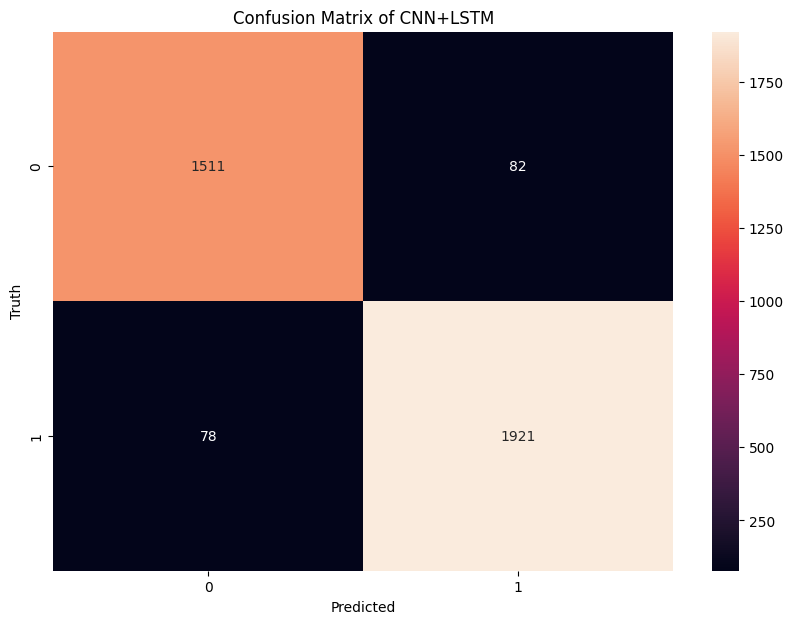


Classification Report of CNN+LSTM:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1593
           1       0.96      0.96      0.96      1999

    accuracy                           0.96      3592
   macro avg       0.95      0.95      0.95      3592
weighted avg       0.96      0.96      0.96      3592



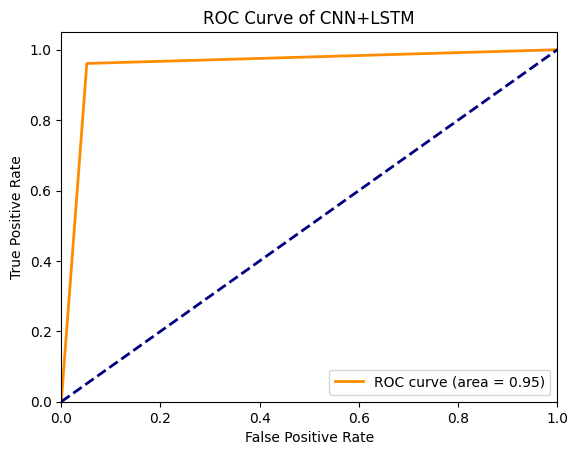

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import seaborn as sns

# Assuming `predicted_labels` are the predictions of our model on the test set
predicted_labels = cnn.predict(X_test)
predicted_labels = np.argmax(predicted_labels, axis=1)
true_labels = np.argmax(y_test, axis=1)  # Assuming y_test is our test labels
# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix of CNN+LSTM")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Classification Report
print("\nClassification Report of CNN+LSTM:")
print(classification_report(true_labels, predicted_labels))

# ROC Curve
fpr, tpr, _ = roc_curve(true_labels, predicted_labels)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of CNN+LSTM')
plt.legend(loc="lower right")
plt.show()

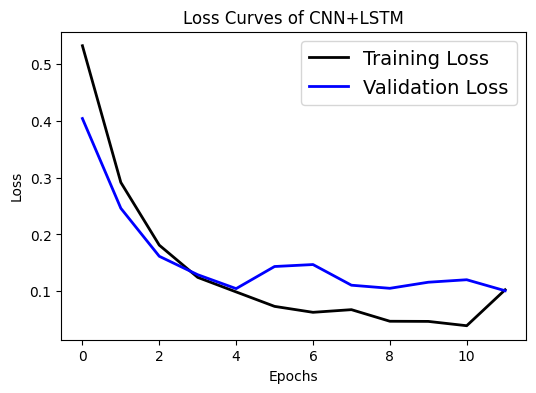

In [17]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves of CNN+LSTM', fontsize=12)
plt.show()